In [123]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [124]:
import pandas as pd
import seaborn as sns

# Leemos el Dataset

In [125]:
Apps = pd.read_csv('googleplaystore.csv')
Apps.shape # Filas y columnas que contiene el dataset

(10841, 13)

In [126]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [127]:
Apps.isnull().sum() # Vemos la cantidad de nulos

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Eliminamos los nulos 
 

In [128]:
Apps.dropna(how='any', inplace=True) # Eliminamos las filas con valores faltantes 
# how(se eliminarán todas las filas que contengan al menos un valor faltante)
# inplace=True (que haga el cambio en el propio dataset y no en una copia)

Apps.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Vemos que hemos eliminado los valores nulos 

In [129]:
Apps.shape

(9360, 13)

Vemos que la mayoría de columnas son de tipo objeto 

In [130]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


Antes de codificar las columnas de tipo objeto, haremos un drop a algunas columnas que, desde nuestra perspectiva no aportan datos importantes


In [131]:
Apps_c = Apps.copy()

Apps_drop = Apps_c.drop(['App', 'Price', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   object 
 3   Size            9360 non-null   object 
 4   Installs        9360 non-null   object 
 5   Type            9360 non-null   object 
 6   Content Rating  9360 non-null   object 
 7   Genres          9360 non-null   object 
dtypes: float64(1), object(7)
memory usage: 658.1+ KB


Ahora con las columnas dropeadas, codificaremos las columnas de tipo objeto

In [132]:
Apps_type = Apps_c[ ['Type'] ]
Apps_type

,Type
0,Free
1,Free
2,Free
3,Free
4,Free
...,...
10834,Free
10836,Free
10837,Free
10839,Free


In [133]:
Apps_category = Apps_c[ ['Category'] ]
Apps_category

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN
...,...
10834,FAMILY
10836,FAMILY
10837,FAMILY
10839,BOOKS_AND_REFERENCE


A la columna Type y Category si le podemos codificar con OneHotEncoder

In [134]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # Nuestro encoder
Apps_drop.reset_index(drop=True, inplace=True) # Al modificar nuestro dataframe puede cambiar el indice 

Ahora tenemos que eliminar esas columnas del dataset para poder insertar las codificadas (ya que si no las dropeamos estas se duplicarían; una codificada y otra no)

In [135]:
Apps_drop = Apps_drop.drop(['Category', 'Type'], axis=1) # Dropeamos las columnas para que luego no se dupliquen
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9360 non-null   float64
 1   Reviews         9360 non-null   object 
 2   Size            9360 non-null   object 
 3   Installs        9360 non-null   object 
 4   Content Rating  9360 non-null   object 
 5   Genres          9360 non-null   object 
dtypes: float64(1), object(5)
memory usage: 438.9+ KB


Codificamos la columna de 'Type' y la agregamos al dataframe

In [136]:
Apps_type_1hot = encoder.fit_transform(Apps_type) # Codificamos la columna 'type'
Apps_type_1hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [137]:
Apps_drop = Apps_drop.join(pd.DataFrame(Apps_type_1hot,columns=[cat for cat in encoder.categories_[0]])) # Unimos el dataframe de la columna 'type' codificada con el dataframe original
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9360 non-null   float64
 1   Reviews         9360 non-null   object 
 2   Size            9360 non-null   object 
 3   Installs        9360 non-null   object 
 4   Content Rating  9360 non-null   object 
 5   Genres          9360 non-null   object 
 6   Free            9360 non-null   float64
 7   Paid            9360 non-null   float64
dtypes: float64(3), object(5)
memory usage: 585.1+ KB


- Codificamos la columna 'Category' y la unimos con el dataframe

In [138]:
Apps_category_1hot = encoder.fit_transform(Apps_category) # Codificamos la columna 'category'
Apps_category_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
Apps_drop = Apps_drop.join(pd.DataFrame(Apps_category_1hot,columns=[cat for cat in encoder.categories_[0]])) # Unimos la columna 'category' codificada con el dataframe
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               9360 non-null   float64
 1   Reviews              9360 non-null   object 
 2   Size                 9360 non-null   object 
 3   Installs             9360 non-null   object 
 4   Content Rating       9360 non-null   object 
 5   Genres               9360 non-null   object 
 6   Free                 9360 non-null   float64
 7   Paid                 9360 non-null   float64
 8   ART_AND_DESIGN       9360 non-null   float64
 9   AUTO_AND_VEHICLES    9360 non-null   float64
 10  BEAUTY               9360 non-null   float64
 11  BOOKS_AND_REFERENCE  9360 non-null   float64
 12  BUSINESS             9360 non-null   float64
 13  COMICS               9360 non-null   float64
 14  COMMUNICATION        9360 non-null   float64
 15  DATING               9360 non-null   f

- Cambiamos el tipo de dato de la columna 'Reviews' y la unimos al dataset

In [140]:
Apps_drop['Reviews'] = Apps_drop['Reviews'].astype(float) # La columna reviews ya era números por lo que solo le cambiamos el tipo de dato con astype
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               9360 non-null   float64
 1   Reviews              9360 non-null   float64
 2   Size                 9360 non-null   object 
 3   Installs             9360 non-null   object 
 4   Content Rating       9360 non-null   object 
 5   Genres               9360 non-null   object 
 6   Free                 9360 non-null   float64
 7   Paid                 9360 non-null   float64
 8   ART_AND_DESIGN       9360 non-null   float64
 9   AUTO_AND_VEHICLES    9360 non-null   float64
 10  BEAUTY               9360 non-null   float64
 11  BOOKS_AND_REFERENCE  9360 non-null   float64
 12  BUSINESS             9360 non-null   float64
 13  COMICS               9360 non-null   float64
 14  COMMUNICATION        9360 non-null   float64
 15  DATING               9360 non-null   f

- Codificamos la columna 'Content Rating' y la unimos al dataset

In [141]:
Apps_content = Apps_drop[ ['Content Rating'] ] # Creamos la variable con la columna 'Content Rating'
Apps_content

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone
...,...
9355,Everyone
9356,Everyone
9357,Everyone
9358,Mature 17+


In [142]:
Apps_drop = Apps_drop.drop(['Content Rating'], axis=1) # La eliminamos de nuestro dataset 

In [143]:
Apps_content_1hot = encoder.fit_transform(Apps_content)

Apps_drop.reset_index(drop=True, inplace=True) # Permite cambiar el indice actual por un nuevo indice para evitar errores al unir el dataframe (Drop= True permite cambiar el indice; inplace=True el dataframe original se modifica, no se crea una copia)

Apps_drop = Apps_drop.join(pd.DataFrame(Apps_content_1hot,columns=[cat for cat in encoder.categories_[0]]))
Apps_drop



,Rating,Reviews,Size,Installs,Genres,Free,Paid,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159.0,19M,"10,000+",Art & Design,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,967.0,14M,"500,000+",Art & Design;Pretend Play,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,87510.0,8.7M,"5,000,000+",Art & Design,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,215644.0,25M,"50,000,000+",Art & Design,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967.0,2.8M,"100,000+",Art & Design;Creativity,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,4.0,7.0,2.6M,500+,Education,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9356,4.5,38.0,53M,"5,000+",Education,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9357,5.0,4.0,3.6M,100+,Education,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9358,4.5,114.0,Varies with device,"1,000+",Books & Reference,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Codificamos la columna 'Genres' y la unimos al dataframe

In [144]:
Apps_drop['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [145]:
Apps_genres = Apps_drop[ ['Genres'] ]
Apps_genres

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
...,...
9355,Education
9356,Education
9357,Education
9358,Books & Reference


In [146]:
Apps_drop = Apps_drop.drop(['Genres'], axis=1) # La eliminamos de nuestro dataset 

In [147]:
Apps_genres_1hot = encoder.fit_transform(Apps_genres) # Codificamos la columna 'Genres' 
Apps_genres_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
Apps_drop = Apps_drop.join(pd.DataFrame(Apps_genres_1hot,columns=[cat for cat in encoder.categories_[0]])) # Unimos el dataframe con la columna codificada a el dataframe original
Apps_drop

,Rating,Reviews,Size,Installs,Free,Paid,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
0,4.1,159.0,19M,"10,000+",1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967.0,14M,"500,000+",1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510.0,8.7M,"5,000,000+",1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644.0,25M,"50,000,000+",1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,967.0,2.8M,"100,000+",1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,4.0,7.0,2.6M,500+,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9356,4.5,38.0,53M,"5,000+",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9357,5.0,4.0,3.6M,100+,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9358,4.5,114.0,Varies with device,"1,000+",1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Codificamos la columna 'Installs' y la unimos al dataframe

In [149]:
Apps_drop.Installs.head(10) # Vemos las 10 primeras lineas de la columna 

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [150]:
Apps_drop.Installs.unique() # Vemos los valores únicos de esta columna

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [151]:
# Reemplazamos el símbolo '+' por algo vacío y la ',' igual

Apps_drop.Installs = Apps_drop.Installs.apply(lambda x: x.replace('+', '').replace(',', '') ) # Remmplazamos el símbolo '+' por un espacio

# Convertimos los datos que son str por int 

Apps_drop.Installs = Apps_drop.Installs.apply(lambda x: int(x)) # Cada elemento de la columna (x) se cambia el dato a int
print(Apps_drop.Installs)

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9355         500
9356        5000
9357         100
9358        1000
9359    10000000
Name: Installs, Length: 9360, dtype: int64


In [152]:
# Apps_drop.reset_index(drop=False, inplace=True)

Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Columns: 160 entries, Rating to Word
dtypes: float64(158), int64(1), object(1)
memory usage: 11.4+ MB


- Columna Size


In [153]:
Apps_drop['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [154]:
Apps_drop['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Vemos que los datos estan en Megabyte y kilobyte, los replazamos por sus 0 correspondidos

In [155]:
Apps_drop['Size'] = Apps_drop['Size'].replace("M", "000",regex=True)
Apps_drop['Size'] = Apps_drop['Size'].replace("k", "",regex=True)
Apps_drop['Size'] = Apps_drop['Size'].replace("\+", "",regex=True)
Apps_drop['Size'] = Apps_drop['Size'].replace(",", "",regex=True)
Apps_drop['Size'] = Apps_drop['Size'].replace("Varies with device", np.nan,regex=True) # Cambiamos "Varies with device" por un nulo


Apps_drop['Size'] = Apps_drop['Size'].astype(float)

Como cambiamos "Varies with device" por nulos ahora llenamos esos nulos con la media de la columna

In [156]:
# calcula la media de la columna
mean = Apps_drop['Size'].mean()

# completa los valores nulos con la media
Apps_drop['Size'] = Apps_drop['Size'].fillna(mean)

In [157]:
# Creamos una variable con la columna Rating (ya que es la unica con valores numéricos) para luego unirla con las otras columnas codificadas
Apps_all = Apps_c[ ['Rating'] ]

Aplicamos el codificador 

In [158]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Apps_drop.reset_index(drop=True, inplace=True) # Al modificar nuestro dataframe puede cambiar el indice 

### Algunas visualizaciones 

### Rating

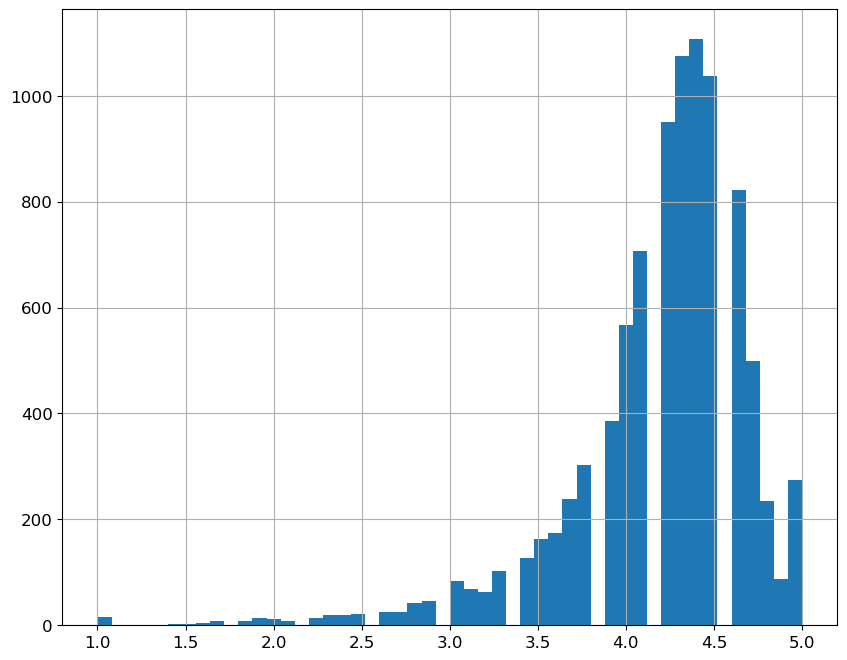

In [159]:
Apps['Rating'].hist(bins=50, figsize=(10,8))
plt.show()

Text(0.5, 1.0, 'Distribución del Rating')

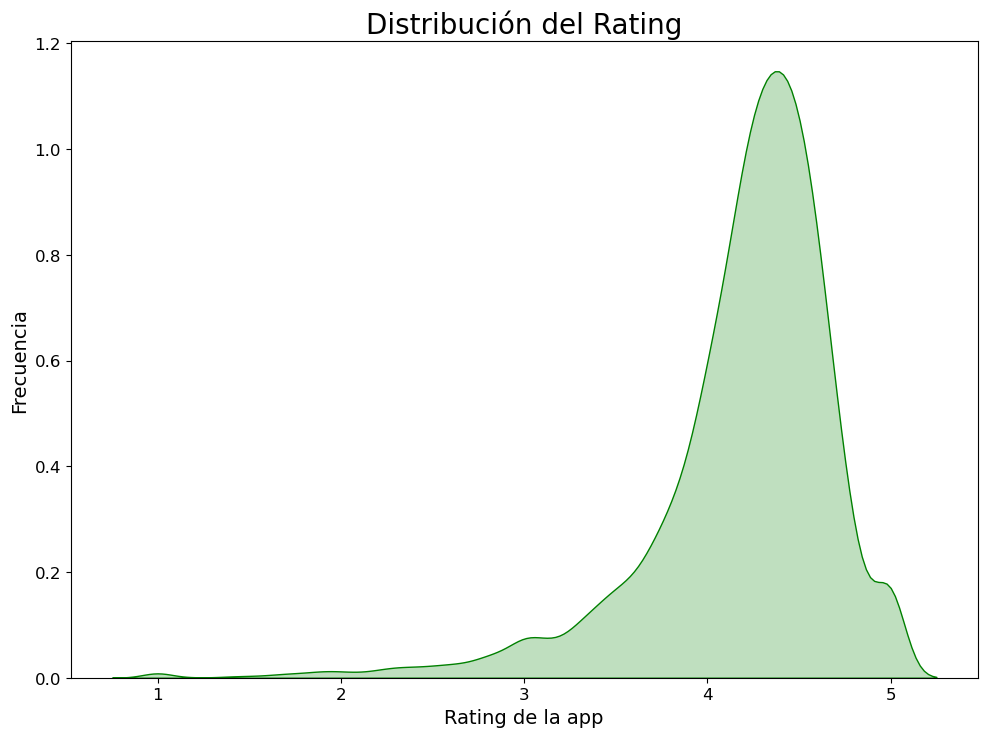

In [160]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(Apps.Rating, color="Green", shade = True)
g.set_xlabel("Rating de la app")
g.set_ylabel("Frecuencia")
plt.title('Distribución del Rating',size = 20)

### Category

In [161]:
print( len(Apps['Category'].unique()) , "categories") # Nos muestra las diferentes categorías que hay; 'unique' hace que las muestre pero sin repetidos

print("\n", Apps['Category'].unique()) # Imprimimos cuales son esas 33 categorias; usamos '\n' para que nos imprima una línea vacía antes de mostrar las categorías

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Cuenta de las aplicaciones por categorías')

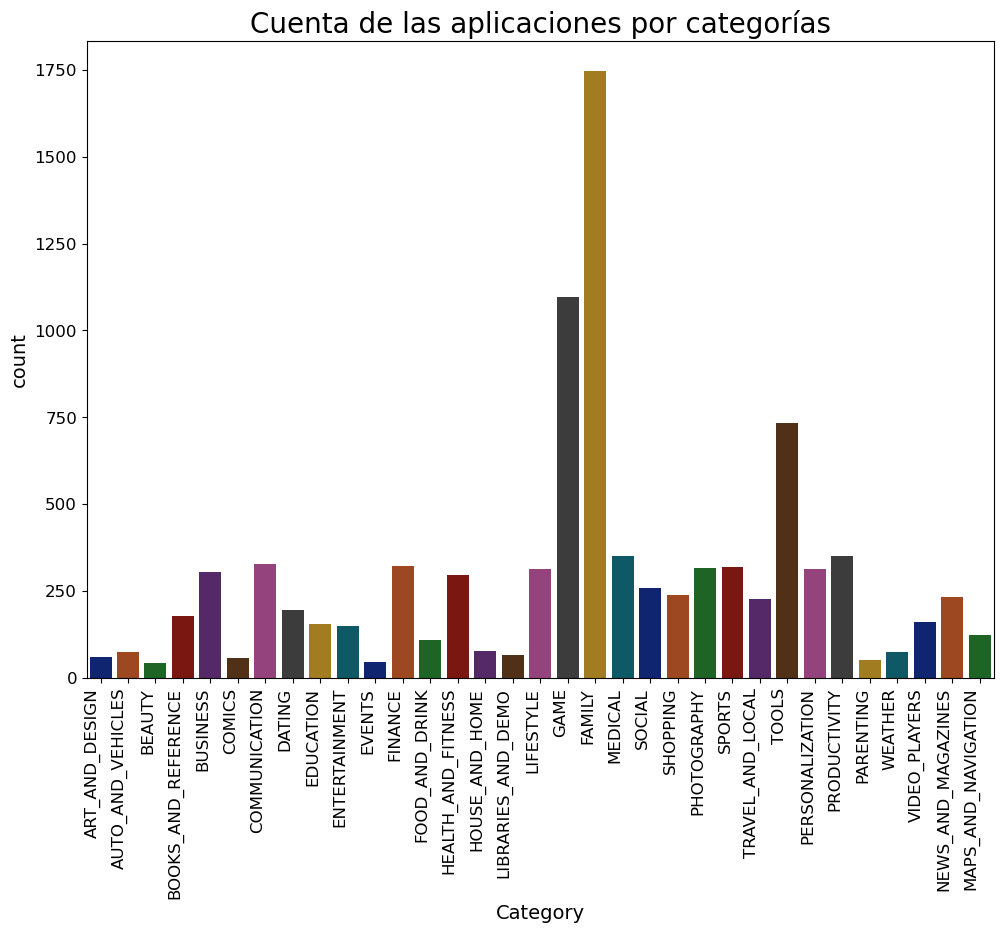

In [162]:
graph = sns.countplot(x="Category",data=Apps, palette = "dark") # papalette = "dark", asignamos una paleta de colores
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, ha="right")
graph 
plt.title('Cuenta de las aplicaciones por categorías',size = 20)

### Reviews

Text(0.5, 1.0, 'Distribution of Reveiw')

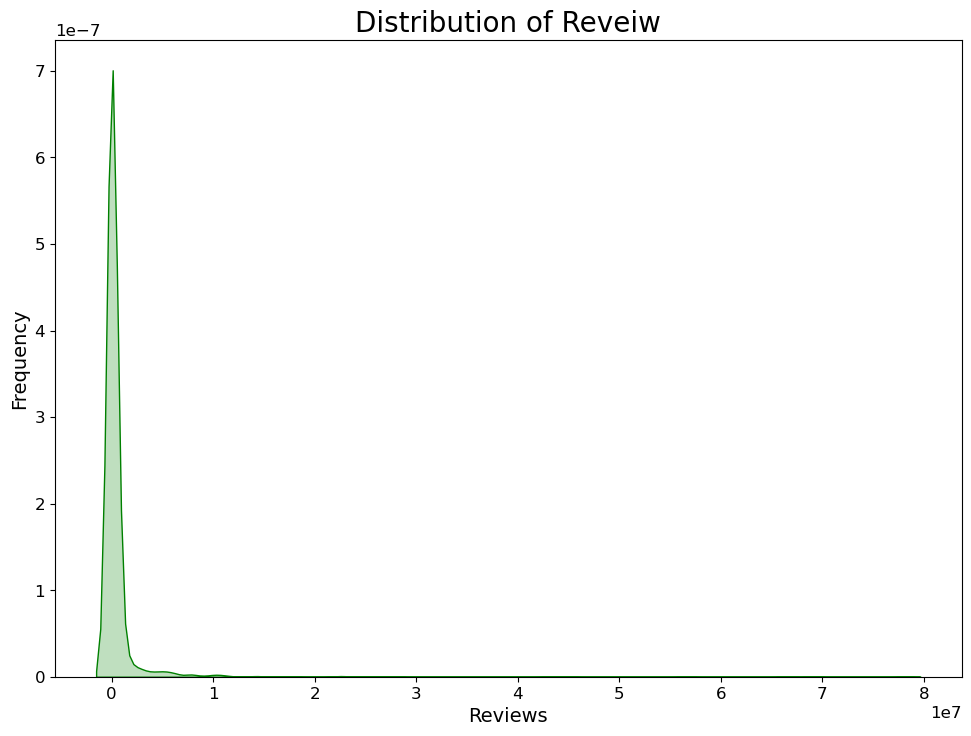

In [163]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(Apps_drop.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

In [164]:
Apps_drop[Apps_drop.Reviews > 5000000].head()

,Rating,Reviews,Size,Installs,Free,Paid,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
322,4.0,56642847.0,21104.397061,1000000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,4.4,69119316.0,21104.397061,1000000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,4.3,9642995.0,21104.397061,1000000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,4.3,11334799.0,21104.397061,500000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338,4.5,5149854.0,21104.397061,100000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\Daniel Paz\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

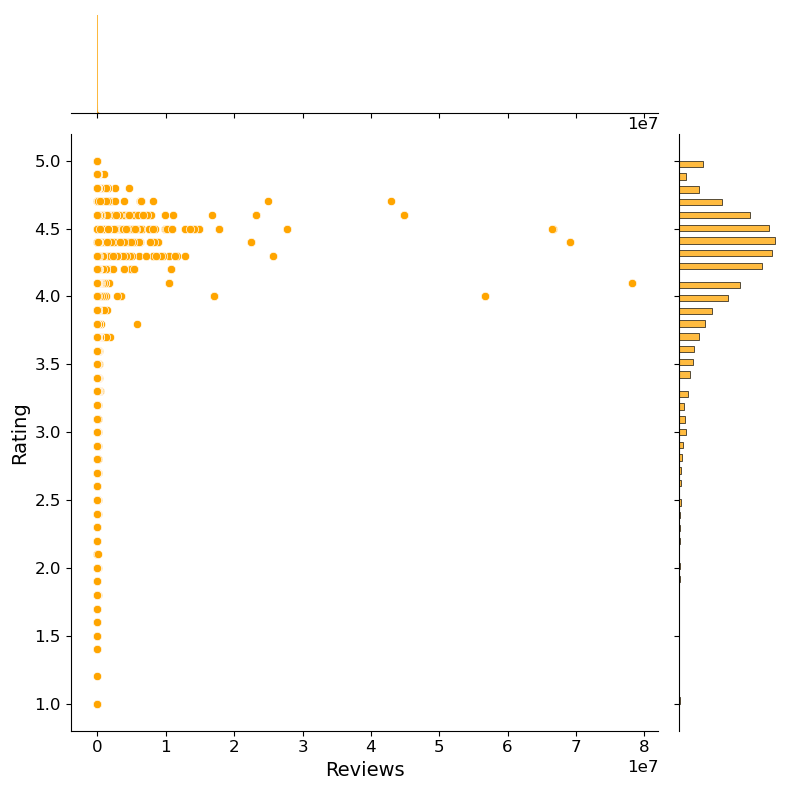

In [165]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=Apps_drop,size = 8);

Podemos observar que a mayor 'Rating' tenga la aplicación van a tener más 'Reviews'

## Size

Comparativa entre Reting y size

c:\Users\Daniel Paz\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

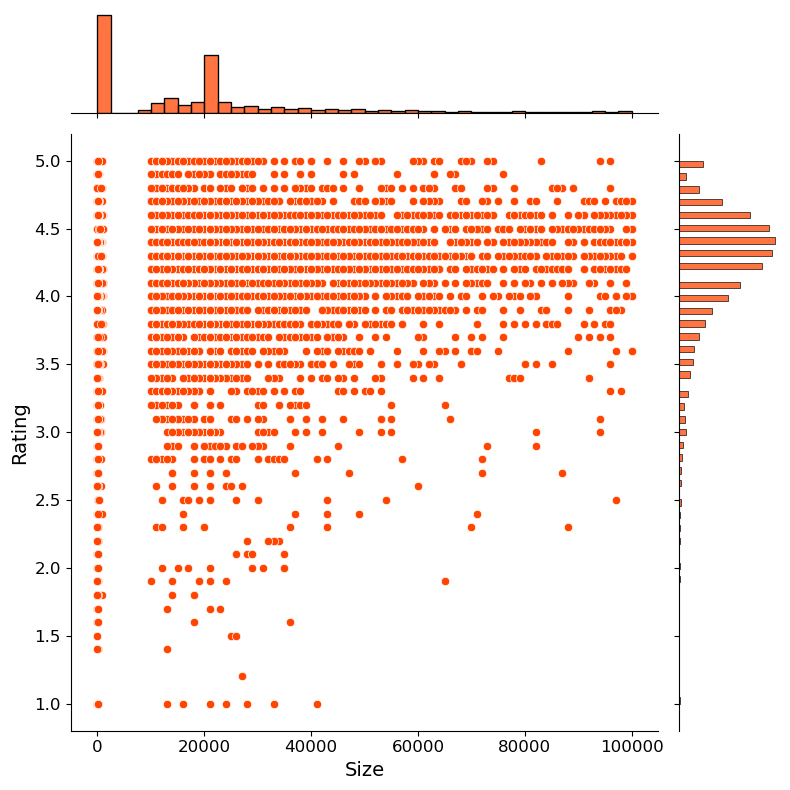

In [166]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=Apps_drop, size = 8);

## Installs

Text(0.5, 1.0, 'Rating VS Installs')

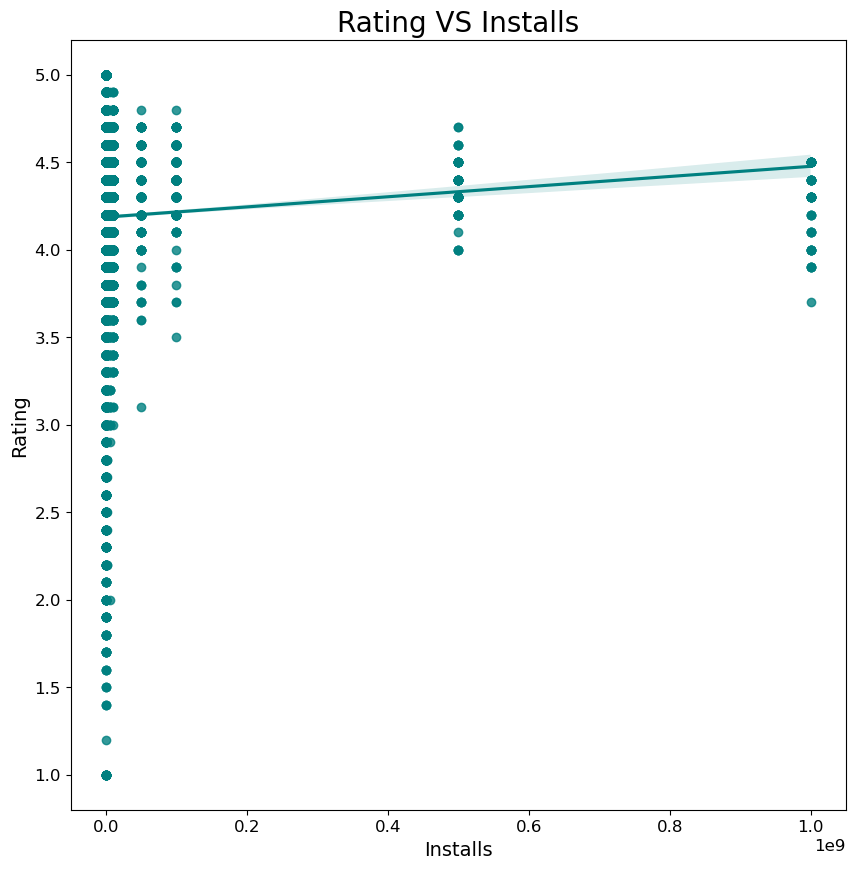

In [167]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=Apps_drop);
plt.title('Rating VS Installs',size = 20)

In [168]:
Apps_drop['Rating'] = Apps_drop['Rating'].astype(str)
Apps_drop['Rating'].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [169]:
Apps_drop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Columns: 160 entries, Rating to Word
dtypes: float64(158), int64(1), object(1)
memory usage: 11.4+ MB


In [170]:
Apps_drop.corr()

,Reviews,Size,Installs,Free,Paid,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
Reviews,1.000000,0.127216,0.641605,0.043244,-0.043244,-0.012524,-0.014052,-0.010780,-0.017311,-0.027238,...,-0.013119,-5.654782e-04,-0.011781,-0.001688,-0.004497,0.007603,-0.001649,-0.002401,-0.009135,-0.004711
Size,0.127216,1.000000,0.081355,0.023735,-0.023735,-0.037371,-0.005327,-0.021106,-0.047300,-0.056644,...,-0.172410,-1.016111e-19,0.014415,-0.009637,-0.004562,-0.030456,0.001225,-0.000555,-0.027783,0.028489
Installs,0.641605,0.081355,1.000000,0.053049,-0.053049,-0.014086,-0.016691,-0.012703,-0.010855,-0.029267,...,-0.007277,-8.957886e-04,0.021701,-0.002017,-0.007994,0.030691,-0.002068,-0.001879,-0.012042,-0.004979
Free,0.043244,0.023735,0.053049,1.000000,-1.000000,0.006309,0.019325,0.018265,0.013174,0.023545,...,-0.019727,2.812104e-03,0.020666,0.002812,0.014902,0.022551,0.003977,0.004871,-0.008666,0.014902
Paid,-0.043244,-0.023735,-0.053049,-1.000000,1.000000,-0.006309,-0.019325,-0.018265,-0.013174,-0.023545,...,0.019727,-2.812104e-03,-0.020666,-0.002812,-0.014902,-0.022551,-0.003977,-0.004871,0.008666,-0.014902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Video Players & Editors,0.007603,-0.030456,0.030691,0.022551,-0.022551,-0.010613,-0.011617,-0.008797,-0.018244,-0.023967,...,-0.038167,-1.354480e-03,-0.020565,-0.001354,-0.007178,1.000000,-0.001916,-0.002346,-0.011777,-0.007178
Video Players & Editors;Creativity,-0.001649,0.001225,-0.002068,0.003977,-0.003977,-0.001184,-0.001296,-0.000981,-0.002035,-0.002674,...,-0.004258,-1.511154e-04,-0.002294,-0.000151,-0.000801,-0.001916,1.000000,-0.000262,-0.001314,-0.000801
Video Players & Editors;Music & Video,-0.002401,-0.000555,-0.001879,0.004871,-0.004871,-0.001450,-0.001588,-0.001202,-0.002493,-0.003275,...,-0.005215,-1.850877e-04,-0.002810,-0.000185,-0.000981,-0.002346,-0.000262,1.000000,-0.001609,-0.000981
Weather,-0.009135,-0.027783,-0.012042,-0.008666,0.008666,-0.007279,-0.007968,-0.006034,-0.012514,-0.016439,...,-0.026178,-9.290198e-04,-0.014105,-0.000929,-0.004923,-0.011777,-0.001314,-0.001609,1.000000,-0.004923


# Ahora empezamos con el entrenamiento


Importes de los algoritmos de medidas

In [172]:
from sklearn.metrics import precision_score, recall_score;
from sklearn.metrics import roc_auc_score;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import f1_score;

-importes de los algoritmos


In [173]:
from sklearn.ensemble import RandomForestClassifier;
from sklearn.linear_model import SGDClassifier;
from sklearn.svm import SVC;

- Separamos nuestro train y nuestro test

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(Apps_drop, test_size=0.30) #cogemos el 20 por ciento para testear
len(X_train), len(X_test)

y_train = X_train["Rating"].copy()
X_train = X_train.drop("Rating", axis=1)

## Entrenamos el modelo 

- Random Forest

In [175]:
forest_clf = RandomForestClassifier (n_estimators=100, random_state=42) # n_estimators çcantidad de árboles a crear
forest_clf.fit (X_train, y_train) 

RandomForestClassifier(random_state=42)

In [177]:
forest_predict = cross_val_predict(forest_clf,
                                X_train, 
                                y_train, 
                                cv=5)

forest_precision = precision_score  (y_train, forest_predict, average=None)
forest_recall    = recall_score     (y_train, forest_predict, average=None)

# print(f"Precision Score: {forest_precision} || Recall Score: {forest_recall}")

print("Precisión:","\t", np.round(forest_precision), np.mean(forest_precision));
print("Recall:","\t",    np.round(forest_recall  ), np.mean(forest_recall  ));

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precisión: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.10560535939722243
Recall: 	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 0.10811018301124274


-Sgd


In [63]:
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)  # Clasificador; el hiperparámetro max_iter hace que ocurran 1000 iteraciones
sgd_clf.fit (X_train, y_train)

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(random_state=42)

In [64]:
sgd_predict = cross_val_predict(sgd_clf,
                                X_train, 
                                y_train, 
                                cv=5)

sgd_precision = precision_score  (y_train, sgd_predict, average="weighted")
sgd_recall    = recall_score     (y_train, sgd_predict, average="weighted")

print(f"Precision Score: {sgd_precision} || Recall Score: {sgd_recall}")

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Precision Score: 0.06619955423638733 || Recall Score: 0.09600122100122101


c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-SVC


In [66]:
svc_clf = SVC(gamma="auto", random_state=42) # gamma="auto": Este parámetro controla la amplitud del kernel (un tipo de función matemática que mide la similitud entre pares de puntos de datos).
svc_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [67]:
svc_predict = cross_val_predict(svc_clf,
                                X_train, 
                                y_train, 
                                cv=5)

svc_precision = precision_score  (y_train, svc_predict, average="weighted")
svc_recall    = recall_score     (y_train, svc_predict, average="weighted")

print(f"Precision Score: {svc_precision} || Recall Score: {svc_recall}")

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precision Score: 0.2728137277508575 || Recall Score: 0.1974969474969475


c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el entrenamiento 